In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

5.4.0


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.



/kaggle/input/asia-covid-19-cases-updated-10-oct-21/AsiaCases_.csv


In [2]:
# export data

df1 = pd.read_csv('/kaggle/input/asia-covid-19-cases-updated-10-oct-21/AsiaCases_.csv')

# check for null values

df1.isnull().sum()

# drop null

df1.dropna(inplace=True)
df1.isnull().sum()

ID                       0
Country                  0
TotalCases               0
TotalDeaths              0
TotalRecovered           0
ActiveCases              0
TotalCasesPerMillion     0
TotalDeathsPerMillion    0
TotalTests               0
TotalTestsPerMillion     0
TotalPopulation          0
dtype: int64

In [3]:
# change index to country instead so it's easier to see the data

df1.set_index('Country', inplace=True)

# find top 10 countries with highest covid cases

top10 = df1['TotalCases'].sort_values(ascending=False).head(10)
top10 = pd.DataFrame(data=top10)

# Analysis by Kaggle page

Top 10 countries in terms of covid-19 cases

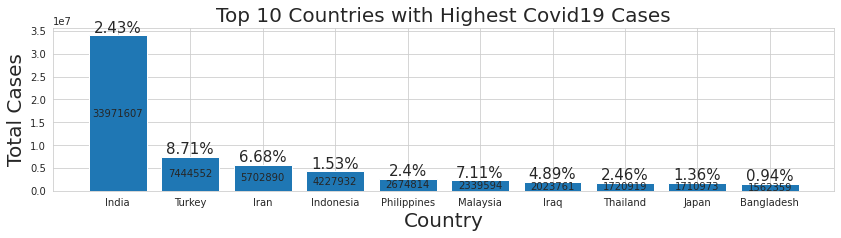

In [4]:
# query and sort top 10 countries 

top10 = df1['TotalCases'].sort_values(ascending=False).head(10)

# create dataframe for ease of viewing and plotting

top10 = pd.DataFrame(data=top10)

# get default indexing

top10.reset_index(level=0,inplace=True)

# construct layer 2 data which is the percentage of population struck by covid

struck_by_covid = pd.DataFrame(round((df1['TotalCases']/df1['TotalPopulation'])*100,2),columns=['StruckByCovid']).astype(str).add('%')
struck_by_covid.reset_index(level=0,inplace=True)

# join layer 1 and layer 2 data into single dataframe (df)

top10_covidcases = top10.join(struck_by_covid.set_index('Country'), on='Country')
top10_covidcases 

# draw chart

fig, ax = plt.subplots(figsize=(14,3))
data = ax.bar(top10_covidcases['Country'],top10_covidcases['TotalCases']) # L1 data

# label the bars

ax.bar_label(data,top10_covidcases['StruckByCovid'],label_type='edge', fontsize=15) # display L2 data on chart
ax.bar_label(data,top10_covidcases['TotalCases'],label_type='center') # display L1 data on chart

# label the axis and title

ax.set_title('Top 10 Countries with Highest Covid19 Cases', fontsize=20)
ax.set_ylabel('Total Cases', fontsize=20)
ax.set_xlabel('Country',  fontsize=20)

plt.show()

Top 10 countries in terms of covid-19 deaths

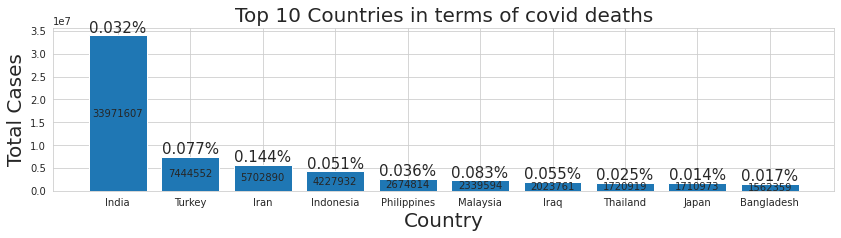

In [5]:
# slice TotalDeaths and TotalPopulation from df1 into desired df 

total_deaths_and_population=pd.DataFrame(df1[['TotalDeaths','TotalPopulation']])
total_deaths_and_population.reset_index(level=0,inplace=True)

# add index 

df2 = top10_covidcases.join(total_deaths_and_population.set_index('Country'), on='Country')
df2

# calculation for % death rates

perc_covid_deaths = round(((df2['TotalDeaths']/df2['TotalPopulation'])*100),3).astype(str).add('%') # math
perc_covid_deaths_df = pd.DataFrame(perc_covid_deaths,columns=['DeathRates']) # put in a df
perc_covid_deaths_df.reset_index(level=0) # reset index
perc_covid_deaths_df

# joining cal for % death rates into df2

df3 = df2.join(perc_covid_deaths_df)

# draw the chart

fig, ax = plt.subplots(figsize=(14,3))
data = ax.bar(df3['Country'],df3['TotalCases']) # L1 data

# label the bars

ax.bar_label(data,df3['DeathRates'],label_type='edge', fontsize=15) # display L2 data on chart
ax.bar_label(data,df3['TotalCases'],label_type='center') # display L1 data on chart

# label the axis and title

ax.set_title('Top 10 Countries in terms of covid deaths', fontsize=20)
ax.set_ylabel('Total Cases', fontsize=20)
ax.set_xlabel('Country', fontsize=20)

plt.show()

Bottom 10 countries in covid cases

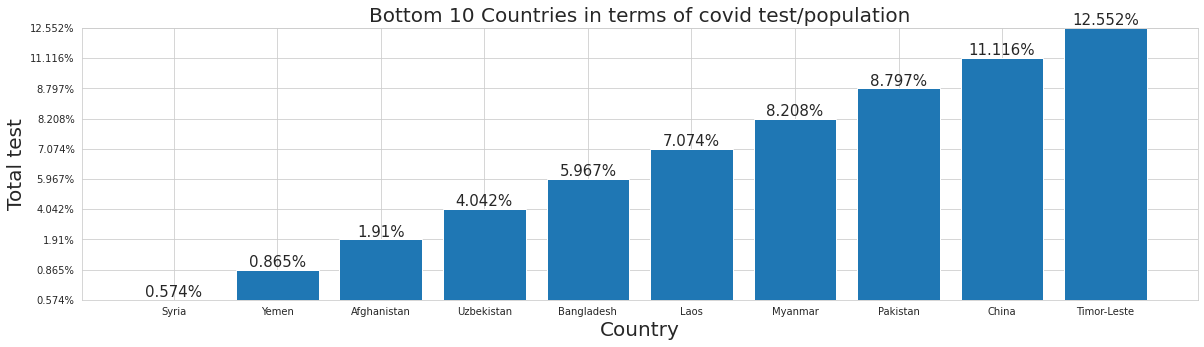

In [6]:
df_lowtest = round(((df1['TotalTests']/df1['TotalPopulation'])),4).sort_values(ascending=True).head(10).astype(str).add('%')
df_lowtest = pd.DataFrame(df_lowtest,columns=['TestRates']) # put in a df
df_lowtest.reset_index(level=0,inplace=True) # reset index
df_lowtest = (df1['TotalTests']/df1['TotalPopulation'])*100
df_lowtest = round(df_lowtest.sort_values(ascending=True).head(10),3).astype(str).add('%')
df_lowtest_df = pd.DataFrame(df_lowtest,columns=['TestRate'])
df_lowtest_df.reset_index(level=0,inplace=True)

# draw the chart

fig, ax = plt.subplots(figsize=(20,5))
bottom10 = ax.bar(df_lowtest_df['Country'],df_lowtest_df['TestRate']) # L1 data

# label the axis and title

ax.set_title('Bottom 10 Countries in terms of covid test/population', fontsize=20)
ax.set_ylabel('Total test', fontsize=20)
ax.set_xlabel('Country', fontsize=20)
plt.ylim([0, 9])

# label the bars

ax.bar_label(bottom10,df_lowtest_df['TestRate'],label_type='edge', fontsize=15) # display L2 data on chart

plt.show()

Find correlation

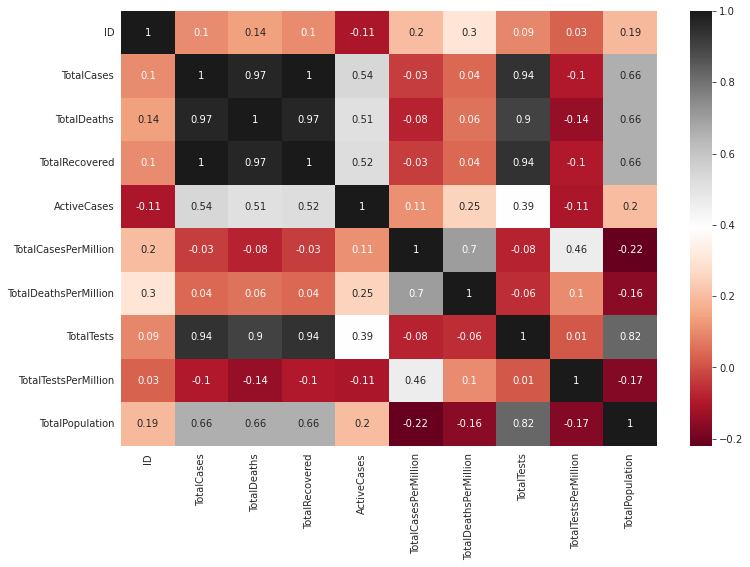

In [7]:
corr = round(df1.corr(method='pearson'),2)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True, cmap='RdGy')

Top 10 countries in terms of death/recovery ratio

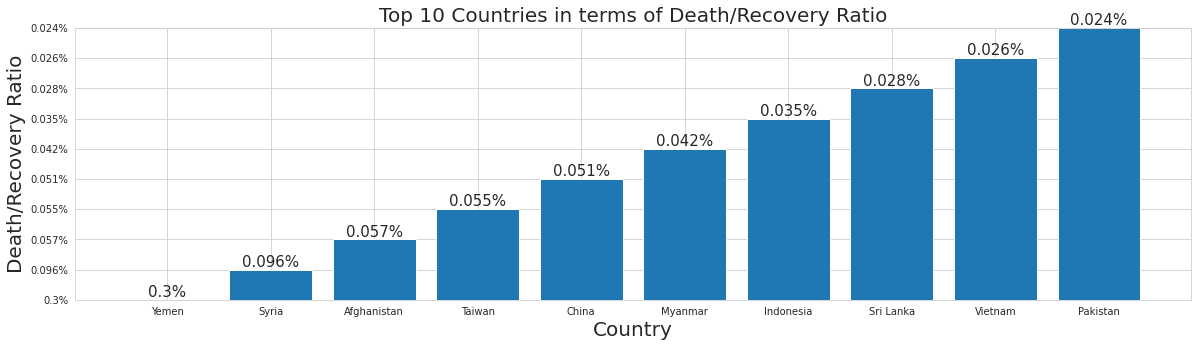

In [8]:
death_recovery_ratio = round(df1['TotalDeaths']/df1['TotalRecovered'],3).sort_values(ascending=False).head(10).astype(str).add('%')
death_recovery_ratio = pd.DataFrame(death_recovery_ratio, columns=['%'])
death_recovery_ratio.reset_index(level=0,inplace=True)

# draw the chart

fig, ax = plt.subplots(figsize=(20,5))
death10 = ax.bar(death_recovery_ratio['Country'],death_recovery_ratio['%']) # L1 data

# # label the axis and title

ax.set_title('Top 10 Countries in terms of Death/Recovery Ratio', fontsize=20)
ax.set_ylabel('Death/Recovery Ratio', fontsize=20)
ax.set_xlabel('Country', fontsize=20)
plt.ylim([0, 9])

# label the bars

ax.bar_label(death10,death_recovery_ratio['%'],label_type='edge', fontsize=15) # display L2 data on chart


plt.show()

# Additional Analysis

Top 10 countries in terms of cases and it's recovery rate

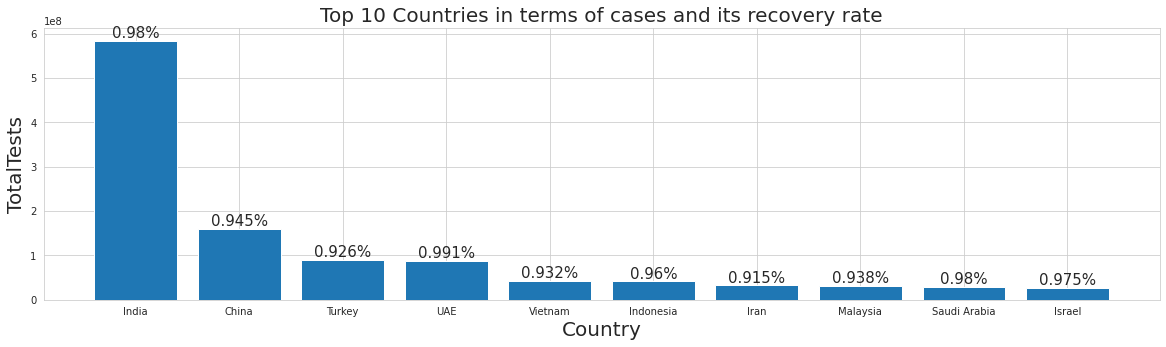

In [9]:
# top 10 countries with higest number of tests

var1 = df1['TotalTests'].sort_values(ascending=False).head(10)
var1 = pd.DataFrame(var1)
var1.reset_index()

var1 = var1.join(df1['TotalCases'], 'Country')
var1 = var1.join(df1['TotalRecovered'], 'Country')
var1 = var1.join(df1['TotalDeaths'], 'Country')

recovery_rate = pd.DataFrame((var1['TotalRecovered']/var1['TotalCases']),columns=['RecoveryRate'])
var1 = var1.join(recovery_rate,'Country')
var1.reset_index(level=0,inplace=True)
var1 = var1.round(decimals=3)

# draw the chart

fig, ax = plt.subplots(figsize=(20,5))
data1 = ax.bar(var1['Country'],var1['TotalTests']) # L1 data

# label the axis and title

ax.set_title('Top 10 Countries in terms of cases and its recovery rate', fontsize=20)
ax.set_ylabel('TotalTests', fontsize=20)
ax.set_xlabel('Country', fontsize=20)

# label the bars

ax.bar_label(data1,var1['RecoveryRate'].astype(str).add('%'),label_type='edge', fontsize=15) # display L2 data on chart


plt.show()

#### Results of hypothesis #1: Wherever you get covid your recovery rate is the same

To ensure we test recovery rate of covid-19 fairly we accessed the countries with top 10 highest test rate. The above graph indicates that despite india having the most covid cases and the highest test rate, the recovery rate is 98%, consistent with the rest of the countries. Further proves that no matter where you get the virus, you will have a 90-98% recovery rate from covid. Caveat to the fact that medical infrastructure has to be in place to facilitate recovery.


#### Hypothesis #2 : low number of cases with high test rate indicates that the country is safe to travel to

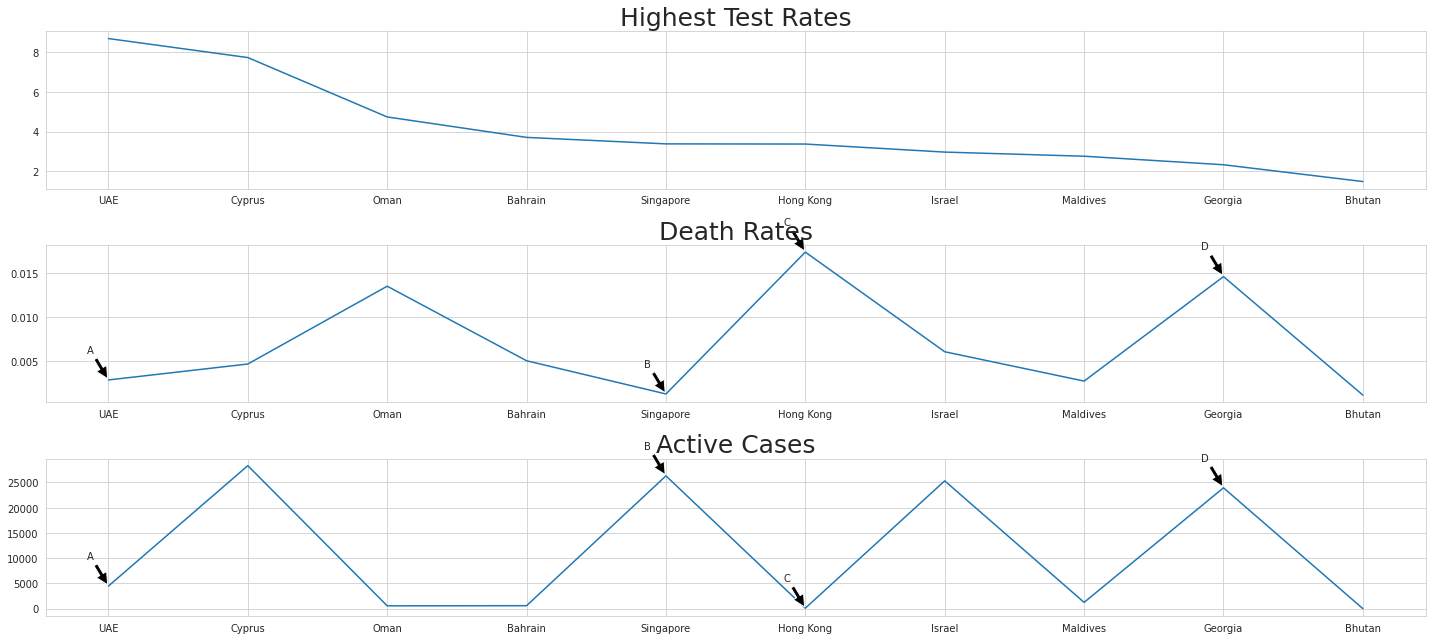

In [10]:
testrate = pd.DataFrame((df1['TotalTests']/df1['TotalPopulation']).sort_values(ascending=False),columns=['TestRate']).head(10)
testrate = testrate.reset_index()
cases = df1['TotalCases']
testrate = testrate.join(cases,'Country')
death = pd.DataFrame((df1['TotalDeaths']/df1['TotalCases']),columns=['DeathRate'])
testrate = testrate.join(death,'Country')
active = pd.DataFrame(df1['ActiveCases'])
testrate = testrate.join(active, 'Country')

# draw the chart

fig, ax = plt.subplots(nrows=3,figsize=(20,9))

ax[0].plot(testrate['Country'],testrate['TestRate'])
ax[1].plot(testrate['Country'],testrate['DeathRate'])
ax[2].plot(testrate['Country'],testrate['ActiveCases'])

# label the axis and title

ax[0].set_title('Highest Test Rates', fontsize=25)
ax[1].set_title('Death Rates', fontsize=25)
ax[2].set_title('Active Cases', fontsize=25)

# label points of interest


ax[1].annotate('A',
            xy=('UAE', 0.002865), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax[2].annotate('A',
            xy=('UAE', 4481), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax[1].annotate('B',
            xy=('Singapore', 0.001276), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax[2].annotate('B',
            xy=('Singapore', 26307), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax[1].annotate('C',
            xy=('Hong Kong', 0.017361), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax[2].annotate('C',
            xy=('Hong Kong', 103), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax[1].annotate('D',
            xy=('Georgia', 0.014583), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax[2].annotate('D',
            xy=('Georgia', 23942), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

The above shows countries with highest test rates, its death rates and its active cases. Within this list of 10, countries with high test rate, death rate, active cases are deemed to be more dangerous to travel to. While the opposite means that country is safe to travel to. 

#### Point A : UAE is the safest place to be in during Q3 of 2021
UAE is the safest with the highest test rate low death, and low active cases. Research showed in the period of sept 2021, Abu Dahbi relaxed domestic tourism restrictions and had a extensive testing regime to ensure tourism returns. Further research suggests that UAE's eagerness to reinstate tourism is due to it's 11.6% contribution to the country's GDP. 

Tourism returns: https://www.khaleejtimes.com/uae/sharjah-islamic-art-festival-addresses-essence-of-existence

UAE GDP: https://www.moec.gov.ae/en/tourism-indicators#:~:text=The%20Contribution%20of%20the%20Travel,amounted%20to%20AED%20143.1%20billion.

#### Point B : Singapore's medical infrastructure is well equipped to support high active cases
Singapore had high active cases, and high cases in general throughout the covid period. However, it's deathrate remained low. Singapore had several high profile covid cluster in the period of 2020 to 2021. One of the most notable is the S11 dormitory cluster - this contributed to community spread as inter mingling workers socialise across dormitories on their days off, then again with different groups of friends within their dormitories. This promoted rapid inter-dormitories infection and eventually leaking into local communities. 


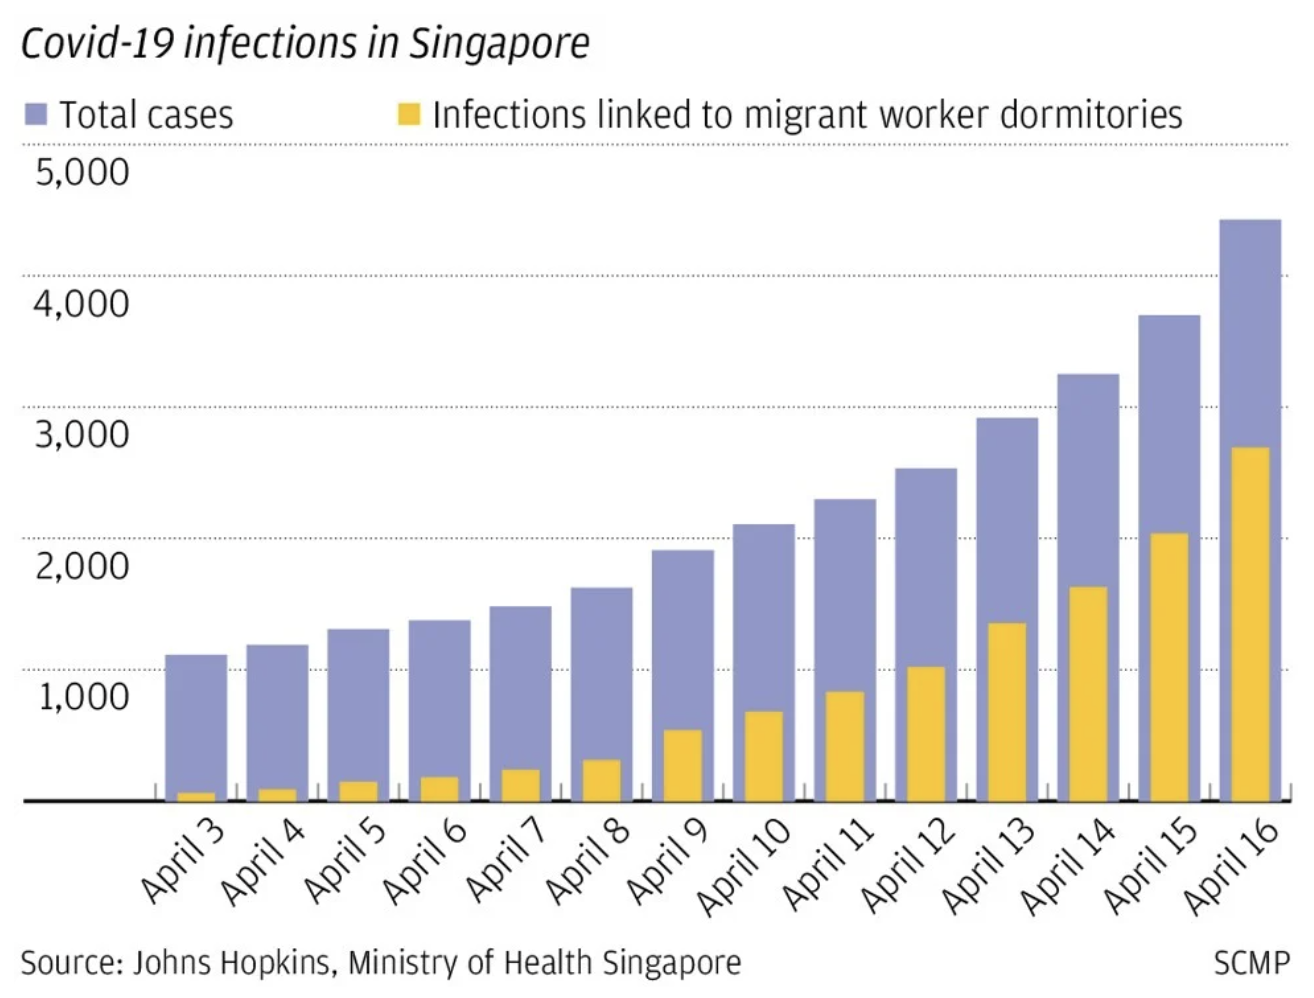

Singapore was quick to adapt it's healthcare infrastructure to accomodate for the rise in cases, similar to china's temporary hospital concept during the height of their covid infection. Singapore was also quick to innovate by researching and developing new test kits, ventilators and technology to anticipate shortages in medical supplies should it ever arises. Hence, it managed to handle the high active cases with relative ease and kept death rates low.

S11 case: https://www.scmp.com/week-asia/explained/article/3080466/how-did-migrant-worker-dormitories-become-singapores-biggest

Infrastructure: https://www.ihis.com.sg/Project_Showcase/covid-19/Pages/covid-community-care-facility-expo-healthtech.aspx

Ventilators: https://www.straitstimes.com/singapore/singhealth-team-develops-ventilator-to-pre-empt-shortage-for-severe-covid-19-cases

#### Point C : Hong Kong's medical aging population contributed to high deathrates
HK has a low active case number which suggest that transmission is low but mortality rate is much higher than it's peers. This may be due to it's larger demographic of aging population. HK has 16.4% of population above 65 years old, one of the highest in Asia. 

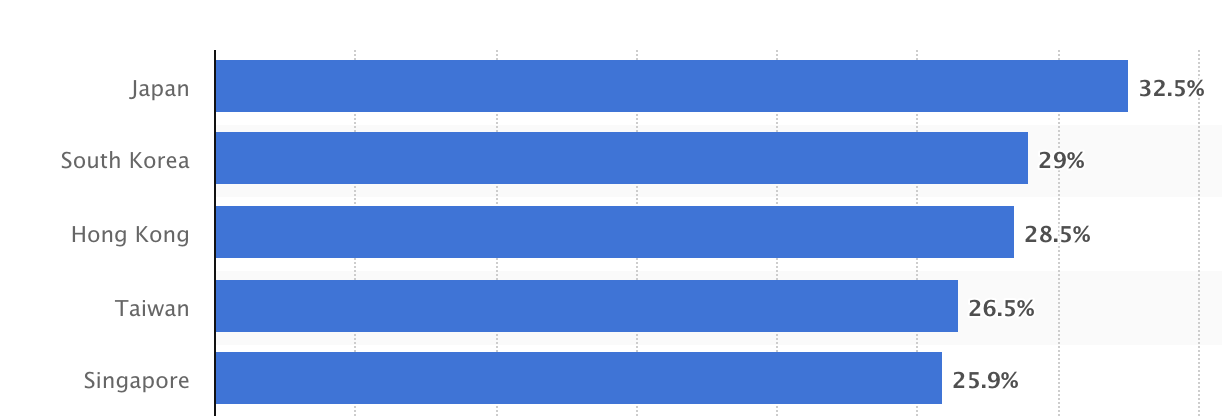

#### Point D : Georgia's medical infrastructure is not equipped to support covid cases along with it's aging population contributed to high deathrates and high transmissibility of covid-19

Geogia has a relatively high aging population of 14.8% which may be reason for the higher death rates in the country. Also it suffers from healthcare system breakdowns which enacted it's country's national guards to assist in medical efforts. In addition, Masks and vaccinations are “strongly encouraged, but not mandated,” hence explains the high infection and deathrates despite being one of the top 10 highest testing rate countries in asia. 

Aging population: https://www.prb.org/resources/countries-with-the-oldest-populations-in-the-world/

Struggling infrastructure: https://apnews.com/article/health-education-georgia-coronavirus-pandemic-68d49b68b7dc73cf6615bc646972a4ec

#### Conclusion
With the exception of Georgia, which appears to be the only outlier in this chart. Most of these top 10 countries are relatively safe to travel to during this covid season they have adequate vaccinated population, medical infrastructure and low death rates to quel the worries of possible infections. 